In [1]:
import sys
import os
import tensorflow as tf
import numpy as np
sys.path.append(".")
sys.path.append("./utils")
from custom_lbfgs import *
from SSAutil import *
from neuralnetwork import NeuralNetwork
from SSA_equations.SSANN import FrictionCDNN
from logger import Logger
from plotting import *
import matplotlib.pyplot as plt

# Manually making sure the numpy random seeds are "the same" on all devices
np.random.seed(1234)
tf.random.set_seed(1234)

In [2]:
# Hyper parameters {{{
hp = {}
# Data size on the solution u
hp["N_u"] = 2000
# Collocation points size, where we’ll check for f = 0
hp["N_f"] = 5000
# DeepNN topology (2-sized input [x t], 8 hidden layer of 20-width, 1-sized output [u]
hp["layers"] = [2, 20, 20, 20, 20, 20, 20, 20, 20, 1]
# Setting up the TF SGD-based optimizer (set tf_epochs=0 to cancel it)
hp["tf_epochs"] = 100000
hp["tf_lr"] = 0.001
hp["tf_b1"] = 0.99
hp["tf_eps"] = 1e-1
# Setting up the quasi-newton LBGFS optimizer (set nt_epochs=0 to cancel it)
hp["nt_epochs"] = 0
hp["nt_lr"] = 1.2
hp["nt_ncorr"] = 50
hp["log_frequency"] = 1000
hp["use_tfp"] = False
# Record the history
hp["save_history"] = True
# path for loading data and saving models
repoPath = "./"
appDataPath = os.path.join(repoPath, "matlab_SSA", "DATA")
path = os.path.join(appDataPath, "Helheim_Weertman_iT080_PINN.mat")
modelPath = "./Models/Helheim_C"
reloadModel = False # reload from previous training
#}}}

In [3]:
# training {{{
# set the path
x, y, X_star, u_star, X_f, xub, xlb, uub, ulb = prep_Helheim_C(path)
# Creating the model and training
logger = Logger(hp)

pinn = FrictionCDNN(hp, logger, X_f, xub, xlb, uub, ulb, modelPath, reloadModel)

X_u = pinn.tensor(X_star)
u = pinn.tensor(u_star)

# error function for logger
def error():
    return pinn.test_error(X_u, u)
logger.set_error_fn(error)

# fit the data
pinn.fit(X_star, u_star)

# save the weights
pinn.save()

# }}}

Hyperparameters:
{
  "N_u": 2000,
  "N_f": 5000,
  "layers": [
    2,
    20,
    20,
    20,
    20,
    20,
    20,
    20,
    20,
    1
  ],
  "tf_epochs": 100000,
  "tf_lr": 0.001,
  "tf_b1": 0.99,
  "tf_eps": 0.1,
  "nt_epochs": 0,
  "nt_lr": 1.2,
  "nt_ncorr": 50,
  "log_frequency": 1000,
  "use_tfp": false,
  "save_history": true
}

TensorFlow version: 2.4.1
Eager execution: True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU-accerelated: True

Training started
-- Starting Adam optimization --
tf_epoch =      0  elapsed = 00:01 (+01.3)  loss = 3.9280e+06  
tf_epoch =   1000  elapsed = 00:03 (+02.3)  loss = 9.9779e+05  
tf_epoch =   2000  elapsed = 00:05 (+02.1)  loss = 2.8141e+05  
tf_epoch =   3000  elapsed = 00:07 (+02.0)  loss = 1.4357e+05  
tf_epoch =   4000  elapsed = 00:09 (+02.2)  loss = 9.5583e+04  
tf_epoch =   5000  elapsed = 00:12 (+02.4)  loss = 5.4495e+04  
tf_epoch =   6000  elapsed = 00:14 (+02.3)  loss = 4.5607e+04  
tf_epoc

No handles with labels found to put in legend.


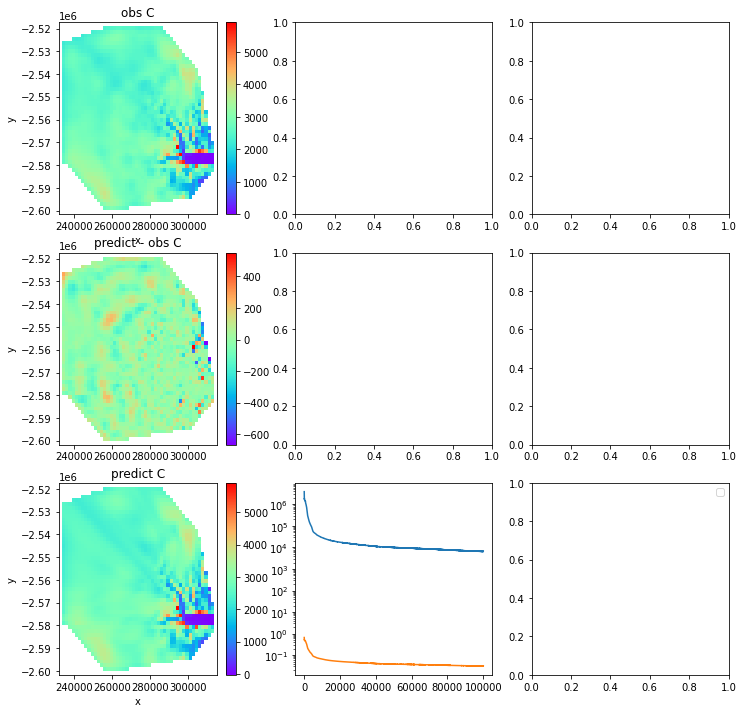

In [4]:
# plot
plot_C_train(pinn, X_star, u_star, xlb, xub)

## test load
#pinn2 = FrictionCDNN(hp, logger, X_f, xub, xlb, uub, ulb)
#pinn2.model = tf.keras.models.load_model('./Models/SheetShelf_C/')
#
## plot
#plot_C_train(pinn2, X_star, u_star, xlb, xub)